In [2]:

import numpy as np
import matplotlib.pyplot as plt
# If you need to import from a local utils.py, uncomment and adjust the following lines:
import sys
import os
import jax.numpy as jnp
# Construct the full path to the folder
folder_path = r'C:\Users\Petrb\Desktop\DTU\3rdSemester\02477_BAYESIAN_MACHINE_LEARNING'

# Add the folder to the Python path
sys.path.append(folder_path)

# Now you can import the utils module
from EXAMS.EXAM_2024.Task_2.utils import *

import numpy as np
import matplotlib.pyplot as plt


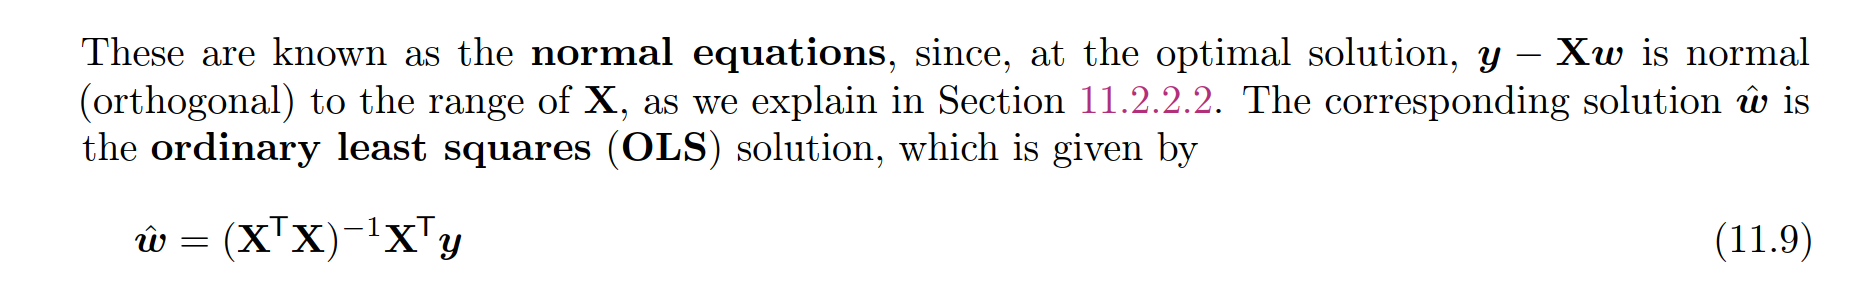

## Part 3: A model with a mixture prior distribution model

Consider the following probabilistic model for an observed variable $\mathbf{y} \in \mathbb{R}^2$ and parameters of interest $\boldsymbol{\theta} \in \mathbb{R}^2$:

$$
p(\boldsymbol{\theta}) = \frac{1}{2} \mathcal{N}(\boldsymbol{\theta} \mid -\mathbf{m}, \tau^2 \mathbf{I}) + \frac{1}{2} \mathcal{N}(\boldsymbol{\theta} \mid \mathbf{m}, \tau^2 \mathbf{I}) \tag{9}
$$

$$
p(\mathbf{y} \mid \boldsymbol{\theta}) = \mathcal{N}(\mathbf{y} \mid \mathbf{X} \boldsymbol{\theta}, \sigma^2 \mathbf{I}) \tag{10}
$$

where

$$
\mathbf{X} = 
\begin{bmatrix}
1 & 0.5 \\
-1 & 1
\end{bmatrix}, \quad
\mathbf{m} = 
\begin{bmatrix}
1 \\
1
\end{bmatrix}, \quad
\mathbf{y} = 
\begin{bmatrix}
1 \\
0
\end{bmatrix}, \quad
\tau^2 = \sigma^2 = 1
$$

are constants and $$\mathbf{I} \in \mathbb{R}^{2 \times 2}$$ is the identity matrix.

---

**Question 3.1**: Compute the maximum likelihood estimate for $\boldsymbol{\theta}$.


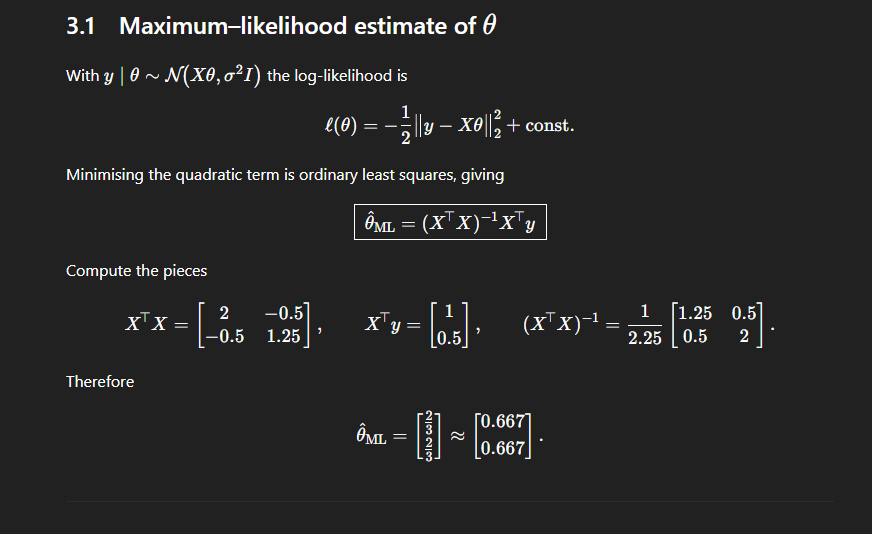


In [5]:
# Define the design matrix X and observation vector y as given in the problem:
# X is a 2x2 matrix:
#   [[ 1,  0.5],
#    [-1,  1 ]]
# y is a 2-dimensional vector:
#   [1, 0]
X = jnp.array([[1, 0.5], [-1, 1]])   # shape: (2, 2)
y = jnp.array([1, 0])                # shape: (2,)
m = np.array([1, 1])              # shape: (2,)
tau2 = 1.0
sigma2 = 1.0

# Compute the Maximum Likelihood Estimate (MLE) for theta using the Ordinary Least Squares (OLS) formula:
# Equation: theta_MLE = (X^T X)^{-1} X^T y
# X.T @ X: shape (2,2)
# X.T @ y: shape (2,)
# Resulting theta_OLS: shape (2,)
theta_OLS = jnp.linalg.inv(X.T @ X) @ X.T @ y
print("theta_OLS:", theta_OLS)  # Output: theta_OLS: [theta_1, theta_2]

# Create a column vector of zeros with the same number of rows as theta_OLS:
# jnp.zeros((X.shape[1], 1)) creates a (2,1) column vector of zeros
zeroes_ols = jnp.zeros((X.shape[1], 1))  # shape: (2,1)
print("zeroes_ols:", zeroes_ols)         # Output: [[0.], [0.]]

theta_OLS: [0.6666667 0.6666667]
zeroes_ols: [[0.]
 [0.]]


**Question 3.2**: Compute the value of the prior density for $\boldsymbol{\theta} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

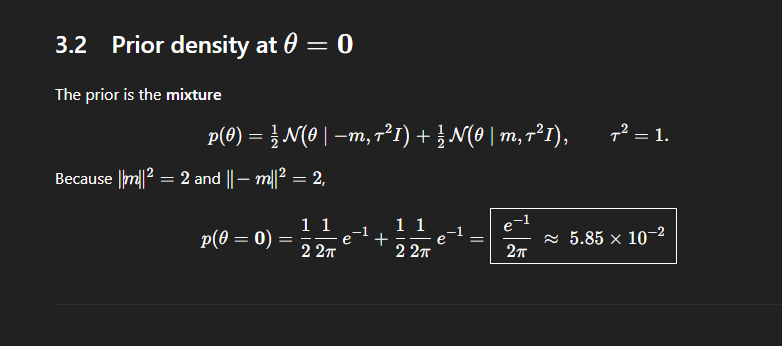

In [8]:
# Import the multivariate normal distribution from scipy.stats (already imported as mvn)
# Define the prior density function for theta as a mixture of two Gaussians:
#   p(theta) = 0.5 * N(theta | -m, tau2 * I) + 0.5 * N(theta | m, tau2 * I)
# where:
#   - m is a 2D mean vector (shape: (2,))
#   - tau2 is the scalar variance (float)
#   - I is the 2x2 identity matrix (np.identity(2), shape: (2,2))
#   - theta is a 2D vector (shape: (2,))
# The function mvn.pdf(x, mean, cov) returns the probability density at x for a multivariate normal.

prior = lambda theta: (
    0.5 * mvn.pdf(theta, mean=-m, cov=tau2 * np.identity(2)) +   # N(theta | -m, tau2*I)
    0.5 * mvn.pdf(theta, mean= m, cov=tau2 * np.identity(2))     # N(theta |  m, tau2*I)
)
# Input: theta (np.ndarray, shape: (2,))
# Output: prior density at theta (float)

# Evaluate the prior at theta = [0, 0]
theta_eval = np.array([0, 0])  # shape: (2,)
prior_at_zero = prior(theta_eval)  # scalar

print(f'The prior evaluated at theta = [0, 0] is {prior_at_zero:3.2f}')
# Output: The prior evaluated at theta = [0, 0] is <value>

The prior evaluated at theta = [0, 0] is 0.06


**Question 3.3**: Determine the analytical expression for the marginal likelihood.


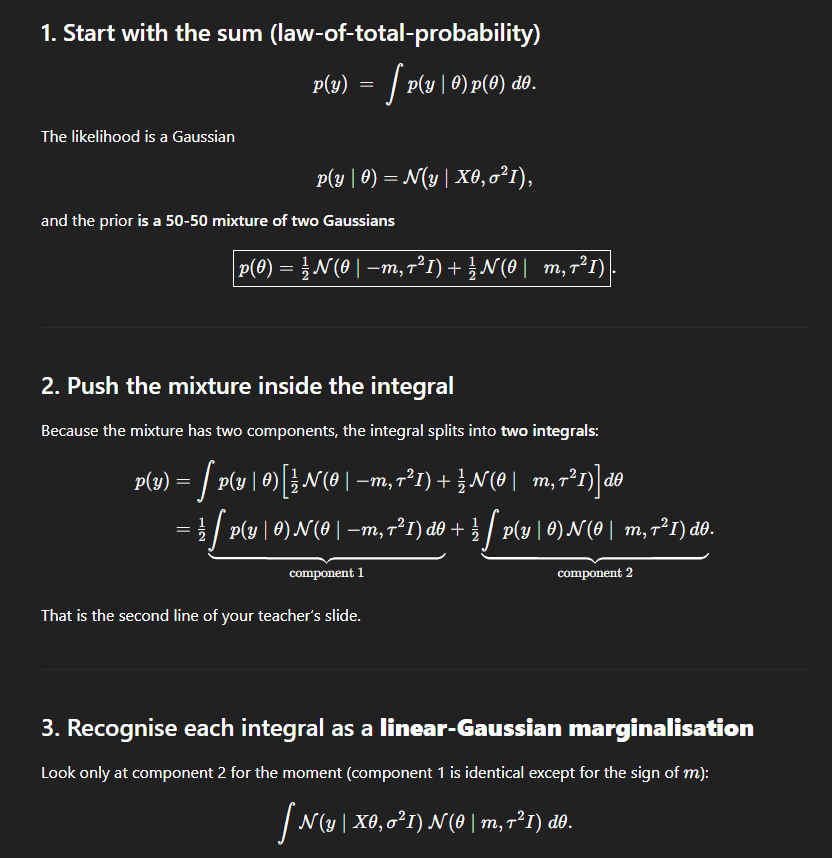

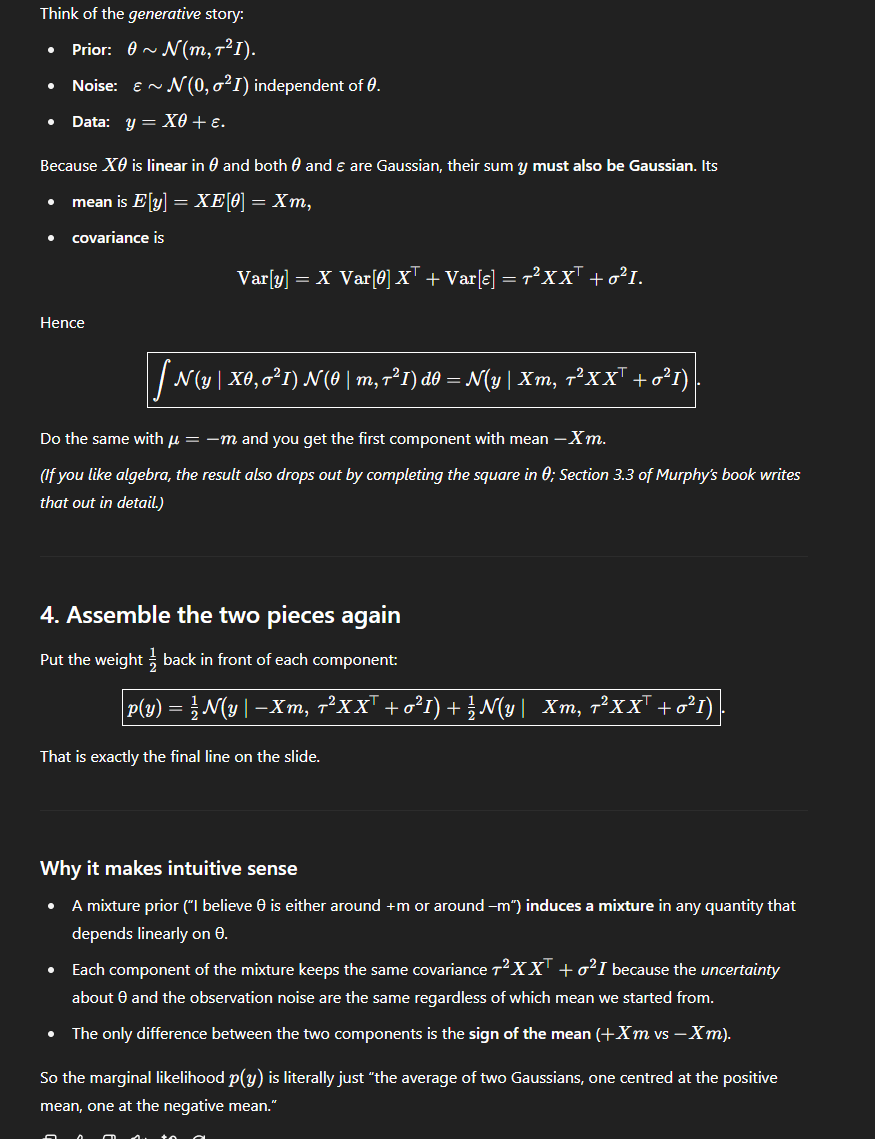

If you did not solve Question 3.3, you can assume $p(\mathbf{y}) = 0.1$ when solving the next question.

**Question 3.4**: Compute the value of the posterior density for $\boldsymbol{\theta} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

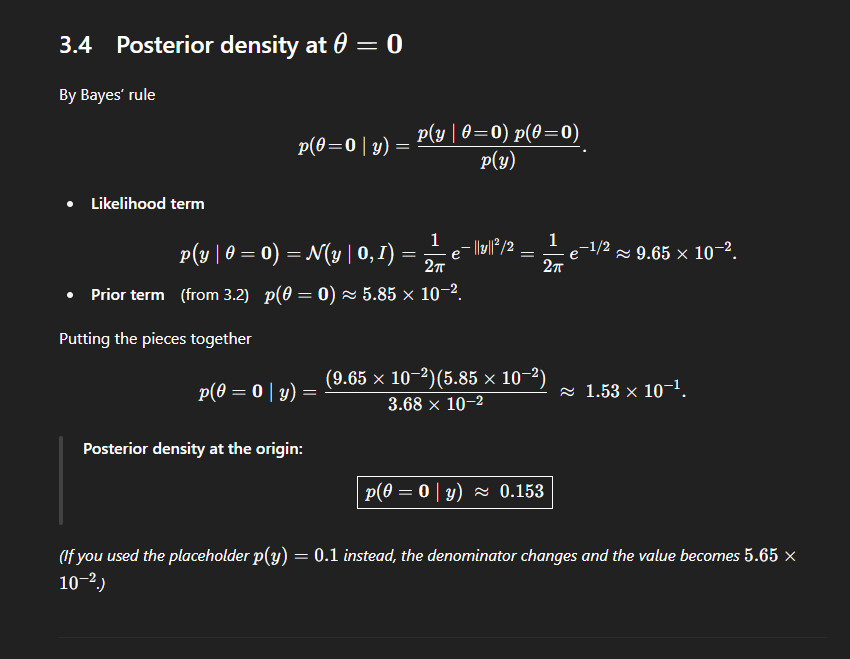


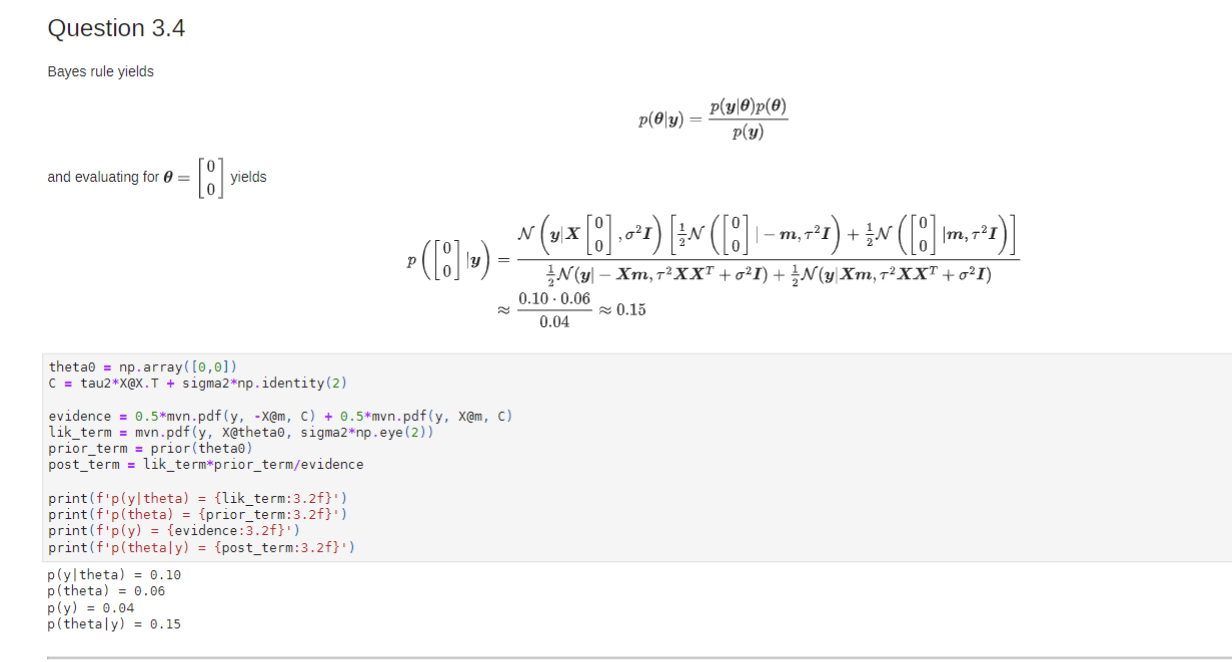

In [13]:
normal_pdf = lambda x, mu, sigma: (1 / (sigma * jnp.sqrt(2 * np.pi))) * jnp.exp(-0.5 * ((x - mu) / sigma) ** 2)

multivarate_normal_pdf = lambda x, mu, sigma: (1 / (jnp.linalg.det(sigma) * jnp.sqrt(2 * np.pi) ** len(mu))) * jnp.exp(-0.5 * ((x - mu).T @ jnp.linalg.inv(sigma) @ (x - mu)))


mu = jnp.array([1, 1])

theta = jnp.array([0, 0])
sigma = 1
tau = 1

sum_of_two_normals = 0.5 *  multivarate_normal_pdf(theta, -mu, sigma * np.eye(2)) + 0.5*  multivarate_normal_pdf(theta, mu, sigma * np.eye(2))

print("sum_of_two_normals:", sum_of_two_normals)

sum_of_two_normals: 0.05854983


In [14]:
C = tau * X @ X.T + sigma * np.eye(X.shape[0])
print(C)

[[ 2.25 -0.5 ]
 [-0.5   3.  ]]


In [15]:
from scipy.stats import multivariate_normal as mvn

#prior_terms = 0.5 * multivarate_normal_pdf(theta, mean=-mu, cov=tau * np.eye(2)) + 0.5 * multivarate_normal_pdf(theta, mean=mu, cov=tau * np.eye(2))
prior_terms = 0.5 * mvn.pdf(theta, mean=-mu, cov=tau * np.eye(2)) + 0.5 * mvn.pdf(theta, mean=mu, cov=tau * np.eye(2))
print(f"p(theta): {prior_terms:.2f}")

p(theta): 0.06


In [16]:
#marginal = 0.5 * multivarate_normal_pdf(y, -X @ mu, C) + 0.5 * multivarate_normal_pdf(y, X @ mu , C)
#print(f"p(y): {marginal:.2f}")
marginal = 0.5 * mvn.pdf(y, mean=-X @ mu, cov=C) + 0.5 * mvn.pdf(y, mean=X @ mu, cov=C)
print(f"p(y) = {marginal:.2f}")

p(y) = 0.04


In [17]:
likelihood = mvn.pdf(y, mean=X @ theta, cov=sigma * np.eye(2))

print(f"p(y|theta): {likelihood:.2f}")

p(y|theta): 0.10


In [18]:
posterior = prior_terms * likelihood / marginal
print(f"p(theta|y): {posterior:.2f}")

p(theta|y): 0.15
